In [ ]:
# Run this in Colab: upload CSV from your computer
from google.colab import files
uploaded = files.upload()   # GUI opens â€” select WA_Fn-UseC_-Telco-Customer-Churn.csv



Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd
import numpy as np

FNAME = "WA_Fn-UseC_-Telco-Customer-Churn.csv"   # yahan correct filename daalo
df = pd.read_csv(FNAME)

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()



Shape: (7043, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check datatypes
print("\nData types:\n", df.dtypes)

# Unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod     

In [ ]:
# Copy original data for safety
data = df.copy()

# 1. Drop customerID (not useful for prediction)
data.drop("customerID", axis=1, inplace=True)

# 2. Replace spaces with NaN in TotalCharges
import numpy as np
data["TotalCharges"] = data["TotalCharges"].replace(" ", np.nan)
data["TotalCharges"] = data["TotalCharges"].astype(float)

# 3. Fill missing TotalCharges with median
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)

# 4. Convert target column 'Churn' into binary (Yes=1, No=0)
data["Churn"] = data["Churn"].map({"Yes":1, "No":0})

# 5. Encode categorical variables (One-Hot Encoding)
import pandas as pd
cat_cols = data.select_dtypes(include=["object"]).columns
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# 6. Scale numerical columns
from sklearn.preprocessing import StandardScaler
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print("âœ… Data cleaned & preprocessed!")
print("Shape after preprocessing:", data.shape)
data.head()


âœ… Data cleaned & preprocessed!
Shape after preprocessing: (7043, 31)


/tmp/ipython-input-1872158508.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0 -1.277445       -1.160323     -0.994242      0        False   
1              0  0.066327       -0.259629     -0.173244      0         True   
2              0 -1.236724       -0.362660     -0.959674      1         True   
3              0  0.514251       -0.746535     -0.194766      0         True   
4              0 -1.236724        0.197365     -0.940470      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            False   
2                           False  ...                            False   
3                            True  ...                            False   
4                           False  ...                            False   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0            False                                False                False   
1            False                                False                False   
2            False                                False                False   
3            False                                False                False   
4            False                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 31 columns]

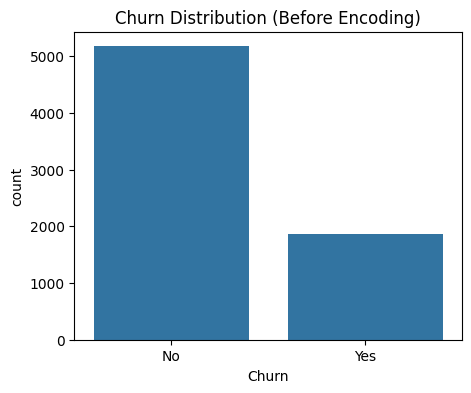

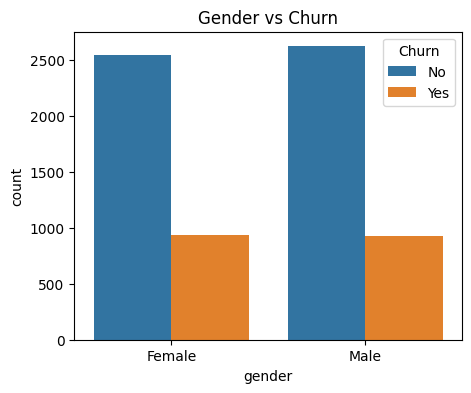

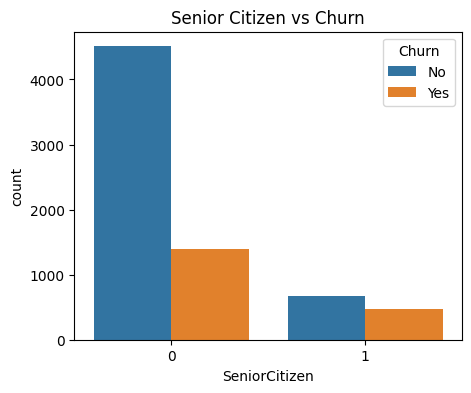

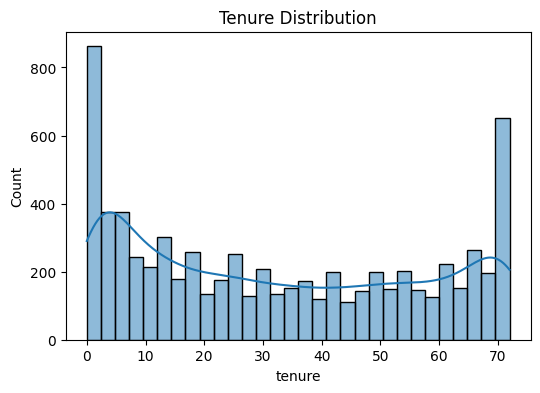

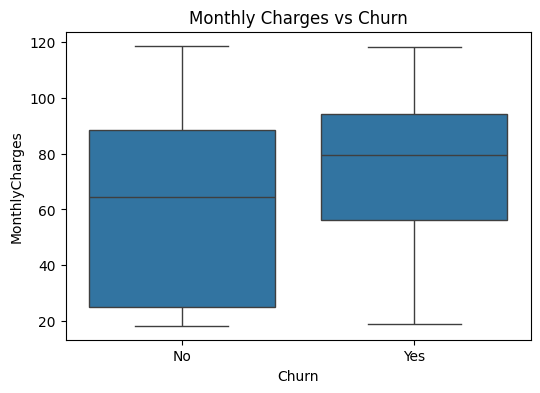

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution (Before Encoding)")
plt.show()

# 2. Gender vs Churn
plt.figure(figsize=(5,4))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Gender vs Churn")
plt.show()

# 3. Senior Citizen vs Churn
plt.figure(figsize=(5,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Senior Citizen vs Churn")
plt.show()

# 4. Tenure distribution
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()

# 5. Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# ðŸ”¹ Step 1: Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# ðŸ”¹ Step 2: Features (X) & Target (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# ðŸ”¹ Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ðŸ”¹ Step 4: Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ðŸ”¹ Step 5: Predictions
y_pred = model.predict(X_test)

# ðŸ”¹ Step 6: Evaluation
acc = accuracy_score(y_test, y_pred)
print("âœ… Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


âœ… Accuracy: 0.7970191625266146

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409


Confusion Matrix:
 [[943  93]
 [193 180]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# ðŸ”¹ Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# ðŸ”¹ Best Parameters
print("Best Parameters:", grid_search.best_params_)

# ðŸ”¹ Best Model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# ðŸ”¹ Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("âœ… Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
âœ… Tuned Accuracy: 0.808374733853797

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
 [[953  83]
 [187 186]]


In [ ]:
print("ðŸ“Œ Final Results & Insights")

print("\nâœ… Tuned Model Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))

print("\nðŸ”¹ Business Insights:")
print("1. Model ~81% accuracy ke saath customer churn predict kar raha hai.")
print("2. Non-churn customers (class 0) ko zyada accurately predict kar raha hai (92% recall).")
print("3. Churn customers (class 1) ko ~50% recall ke saath detect kar raha hai, jo improvement ke liye scope dikhata hai.")
print("4. Company churn wale customers ke liye targeted offers, better support aur loyalty programs use kar sakti hai.")

ðŸ“Œ Final Results & Insights

âœ… Tuned Model Accuracy: 0.808

ðŸ”¹ Business Insights:
1. Model ~81% accuracy ke saath customer churn predict kar raha hai.
2. Non-churn customers (class 0) ko zyada accurately predict kar raha hai (92% recall).
3. Churn customers (class 1) ko ~50% recall ke saath detect kar raha hai, jo improvement ke liye scope dikhata hai.
4. Company churn wale customers ke liye targeted offers, better support aur loyalty programs use kar sakti hai.


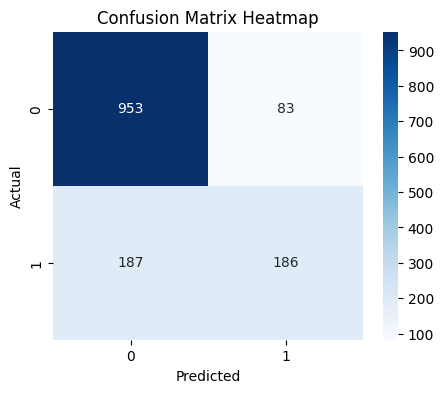

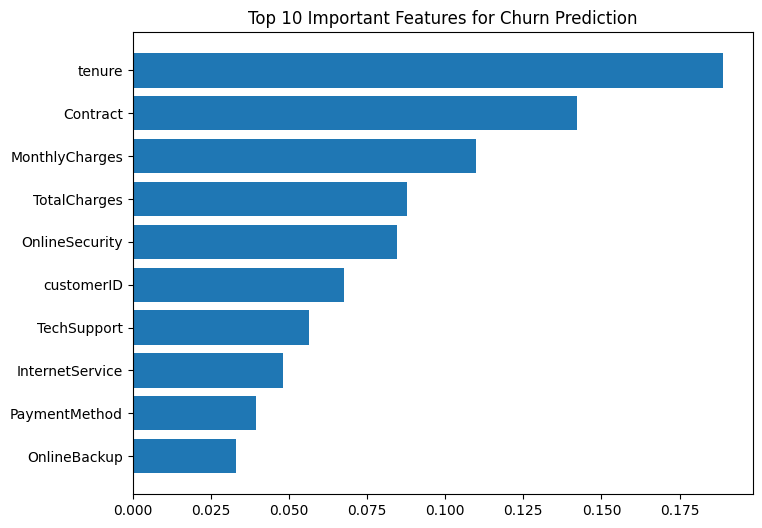

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# ðŸ”¹ Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ðŸ”¹ Feature Importance Plot
importances = best_model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()


In [ ]:

from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)
